#   *** EDA and RandomForest Model ***

# Objective

> ###  Build a model to predict the customers who are about to leave the company. With the help of this model the compay can controll their customer attrition rate

### Download the data from here

link : 'https://www.kaggle.com/radmirzosimov/telecom-users-dataset'

# Available Details

> customerID - customer id 

> gender - client gender (male / female)

> SeniorCitizen - whether the client is a pensioner (1, 0)

> Partner - whether the client is married (Yes, No)

> Dependents - does the client have dependents (Yes, No)

> tenure - how many months a person has been a client of the company

> PhoneService - is the telephone service activated (Yes, No)

> MultipleLines - whether multiple telephone lines are connected (Yes, No, No phone service)

> InternetService - client's Internet provider (DSL, Fiber optic, No)

> OnlineSecurity - is the online security service enabled (Yes, No, No internet service)

> OnlineBackup - is the online backup service activated (Yes, No, No internet service)

> DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

> TechSupport - is the technical support service activated (Yes, No, No internet service)

> StreamingTV - is the streaming TV service activated (Yes, No, No internet service)

> StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
 
> Contract - type of customer contract (Month-to-month, One year, Two year)

> PaperlessBilling - whether the client uses paperless billing (Yes, No)


> PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

> MonthlyCharges - current monthly payment

> TotalCharges - the total amount that the client has paid for the services for the entire time

> Churn - whether there was a churn (Yes or No)

In [157]:
import numpy as np
import pandas as pd

# Import data

In [158]:
data = pd.read_csv(r'telecom_users.csv')

# Exploratory Data Analysis

In [159]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [160]:
columns=list(data.columns)
print(f"there are totally {len(columns)} Features") 

there are totally 22 Features


# Out of 22, 2 features are not important so i am droping those

In [161]:
data.drop(['Unnamed: 0','customerID'],axis=1,inplace=True)

### Checking whether there is any missing values

In [162]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### First we need to change the data types. because if we have object datatype, then we will not be able to find out missing values properly

In [163]:
# Splitting the data into numerical and categorical data

categorical = data.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
numerical = data.drop(categorical.columns,axis=1)

In [164]:
# Converting Object into categorical feature
categorical=categorical.astype('category')

# Converting Object into numerical feature
numerical=pd.to_numeric(numerical.TotalCharges)

1. We are getting this error :: " ValueError: Unable to parse string " " at position 356"
2. Which means there are some missing values in the form of strings. and we need to fix it

In [165]:
# Changing the object to categorical features
numerical.TotalCharges=numerical.TotalCharges.astype('category')

# Finding the index of missing value
missing_index1=np.where(numerical.TotalCharges==' ')

# Filling it with Nan value
numerical.TotalCharges.iloc[missing_index1]=np.nan

# Converting it into float
numerical=numerical.astype('float')

numerical.TotalCharges.isnull().sum()

10

In [166]:
missing_index1

(array([ 356,  634, 2771, 3086, 3255, 4326, 5375, 5382, 5695, 5951]),)

### There are totally 10 missing values in TotalCharges column

In [167]:
# Concatinating categorical and numerical data

new_data = pd.concat([categorical,numerical],axis=1)

In [168]:
new_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Churn                0
tenure               0
MonthlyCharges       0
TotalCharges        10
dtype: int64

### Importing required libraries

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr,pearsonr

# Let's try to create new variables using tenure, Total charge and monthly charge

#### Feature 1: monthly_times_totalcharge

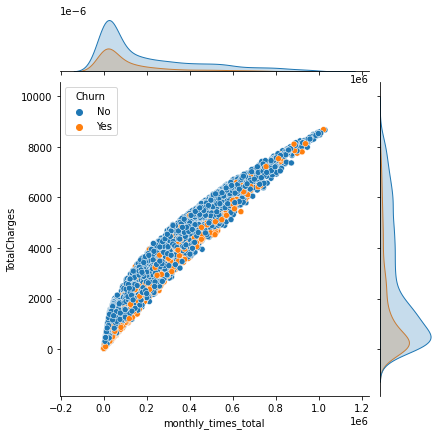

In [170]:
monthly_times_total=pd.Series(new_data.MonthlyCharges*new_data.TotalCharges,name="monthly_times_total")

sns.jointplot(x=monthly_times_total,y=new_data.TotalCharges,hue=new_data.Churn)

### 1.Seems to be correlated with each other

#### taking square root

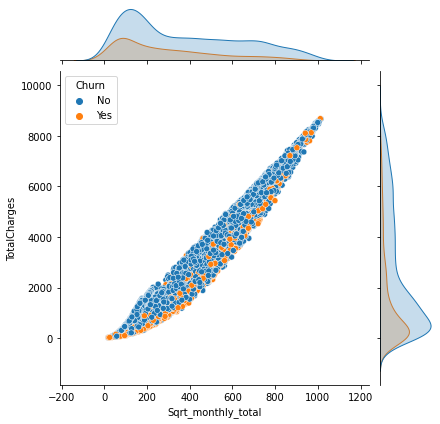

In [171]:
Sqrt_monthly_total=pd.Series(np.sqrt(new_data.MonthlyCharges*new_data.TotalCharges),name='Sqrt_monthly_total')
sns.jointplot(x=Sqrt_monthly_total,y=new_data.TotalCharges,hue=new_data.Churn)

### 1. seems to be the mirror image of the previoue one

### Adding tenure and monthly charge

In [172]:
monthly_plus_tenure = pd.Series(new_data.MonthlyCharges+new_data.tenure,name="monthly_plus_tenure")

<Figure size 1440x720 with 0 Axes>

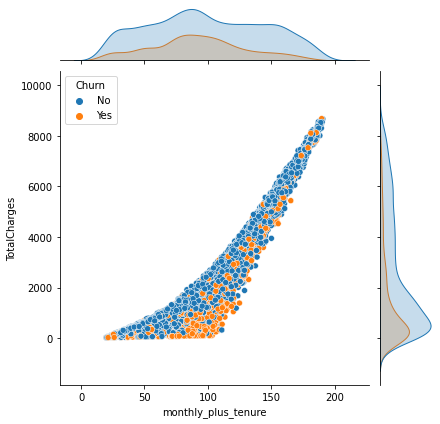

In [173]:
fig = plt.figure(figsize=(20,10))
sns.jointplot(x=monthly_plus_tenure,y=new_data.TotalCharges,data=new_data,hue=new_data.Churn)

### we can see that there is a linear relation between monthly_tenure and Total charge

### Multiplying Monthly charge and tenure

In [174]:
monthly_times_tenure=pd.Series(new_data.MonthlyCharges*new_data.tenure,name="monthly_times_tenure")

<Figure size 1440x720 with 0 Axes>

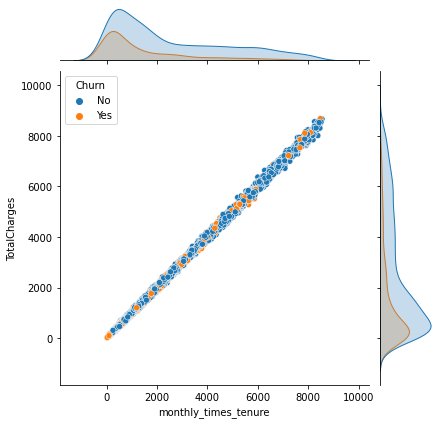

In [175]:
fig = plt.figure(figsize=(20,10))
sns.jointplot(x=monthly_times_tenure,y=new_data.TotalCharges,data=new_data,hue=new_data.Churn)

### As we can see there is a absolute positive correlation between monthly_times_tenure and Total charge

# Adding new features to the data

In [176]:
new_data=pd.concat([new_data,monthly_times_total,Sqrt_monthly_total,monthly_plus_tenure,monthly_times_tenure],axis=1)

### How each of them are correlated 

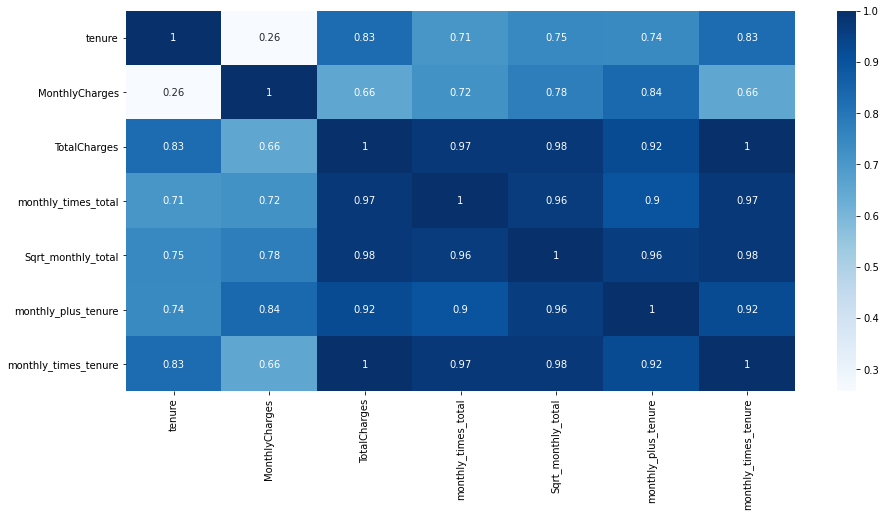

In [177]:
correlation=new_data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(correlation,cmap='Blues',annot=True)

### As we can see Monthly time tennure is highly correlated with Total Charge so we can use this feature to fill missing values in Total charge

In [178]:
new_data.iloc[missing_index1]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges,monthly_times_total,Sqrt_monthly_total,monthly_plus_tenure,monthly_times_tenure
356,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),No,0.0,61.90,NaN,NaN,NaN,61.90,0.0
634,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),No,0.0,56.05,NaN,NaN,NaN,56.05,0.0
2771,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No,0.0,25.35,NaN,NaN,NaN,25.35,0.0
3086,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,No,0.0,19.70,NaN,NaN,NaN,19.70,0.0
3255,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No,0.0,19.85,NaN,NaN,NaN,19.85,0.0
4326,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,No,0.0,80.85,NaN,NaN,NaN,80.85,0.0
5375,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No,0.0,20.25,NaN,NaN,NaN,20.25,0.0
5382,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No,0.0,20.00,NaN,NaN,NaN,20.00,0.0
5695,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),No,0.0,52.55,NaN,NaN,NaN,52.55,0.0
5951,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No,0.0,25.75,NaN,NaN,NaN,25.75,0.0


### Unfortunatly we have zeros in tennure column. so i am going to drop these 10 data points.
### Reason for droping these data points
       1. We do not have tenure information for these data points
       2. More over already we have enough data points in No Churn class so we can drop these data points

### Droping the nan values

In [179]:
new_data.dropna(inplace=True)

# Exploring each and Every individual features

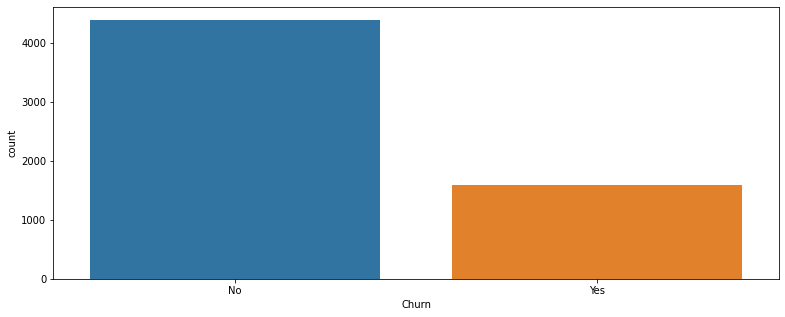

In [180]:
# Checking whether or not the data is balanced.
fig = plt.figure(figsize=(13,5))
sns.countplot(data=new_data,x='Churn')

  
   ### The data is imbalanced

### Dstribution of Numerical dataset

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'monthly_times_total',
       'Sqrt_monthly_total', 'monthly_plus_tenure', 'monthly_times_tenure'],
      dtype='object')


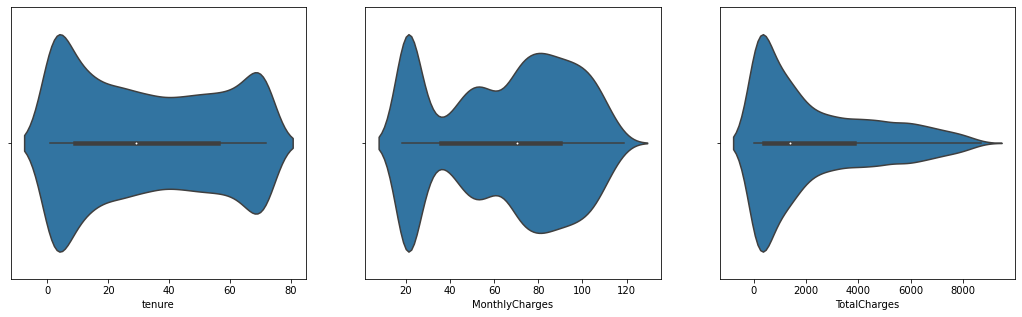

In [181]:
numerical_col = new_data.columns[(new_data.dtypes!='category')]
fig,axes = plt.subplots(1,3,figsize=(18,5))
print(numerical_col)
sns.violinplot(ax=axes[0],x=new_data[numerical_col[0]])
sns.violinplot(ax=axes[1],x=new_data[numerical_col[1]])
sns.violinplot(ax=axes[2],x=new_data[numerical_col[2]])

### 1. Total Charge is highly correlated tenure and Monthly charge

### To get overall idea about how numerical features are usefull in finding patterns, let's use pair plot

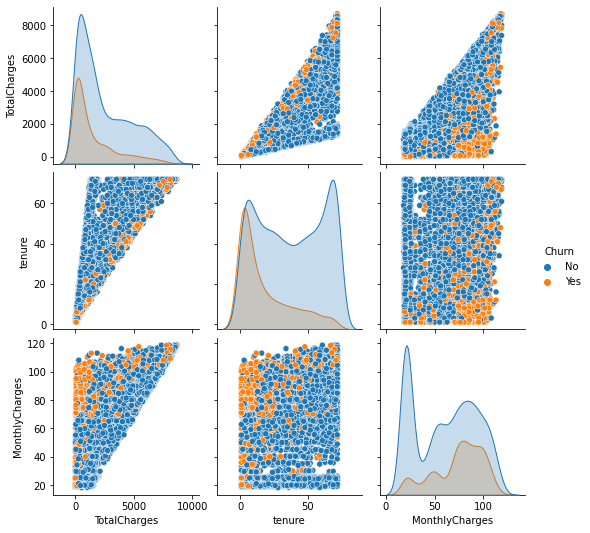

In [182]:
sns.pairplot(data=new_data,vars=['TotalCharges','tenure','MonthlyCharges'],hue='Churn')

# Observations
### 1. Most of the customers leaves within a short period of time 
### 2. Most of the new customers leave the company when they are charged high mothly Charge
### 3. Those who pay high total charge whithin short tenure, tend to leave the company 

# Now let's explore the categorical features

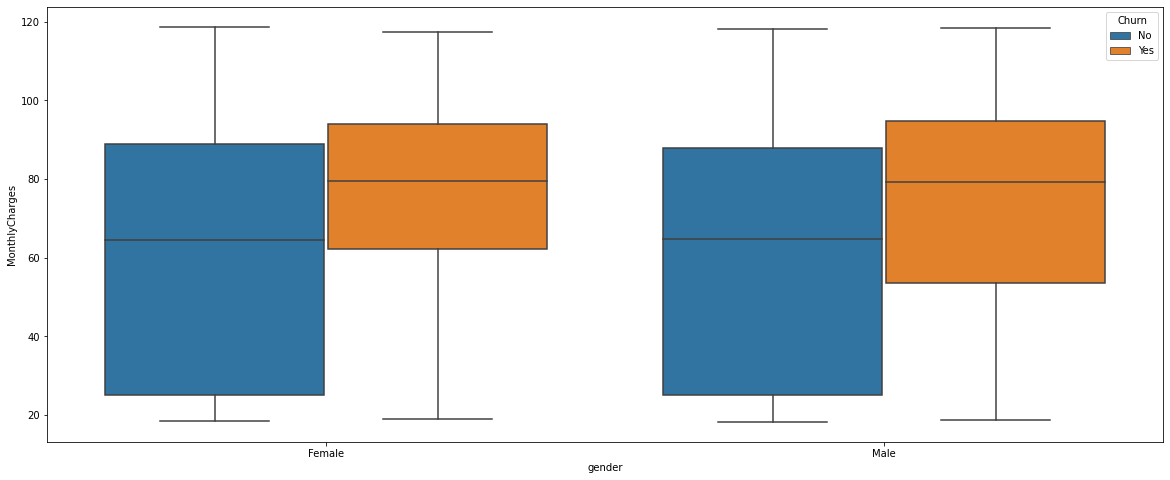

In [183]:
fig = plt.figure(figsize=(20,8))

sns.boxplot(x=new_data.gender,y=new_data.MonthlyCharges,hue=new_data.Churn)

### 1. If the monthly charge is less then the customers are less likely to leave the company
### 2. The churn starts when Monthly charge is greater than 45

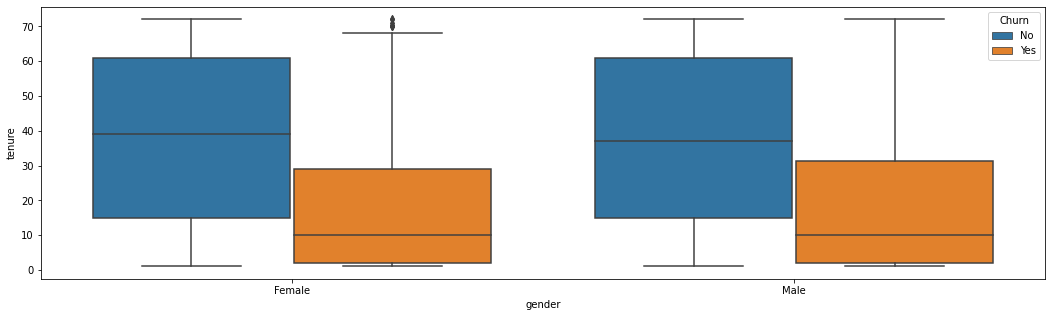

In [184]:
fig = plt.figure(figsize=(18,5))

sns.boxplot(x=new_data.gender,y=new_data.tenure,hue=new_data.Churn)

### Mostly the new customers are more likly to leave the company

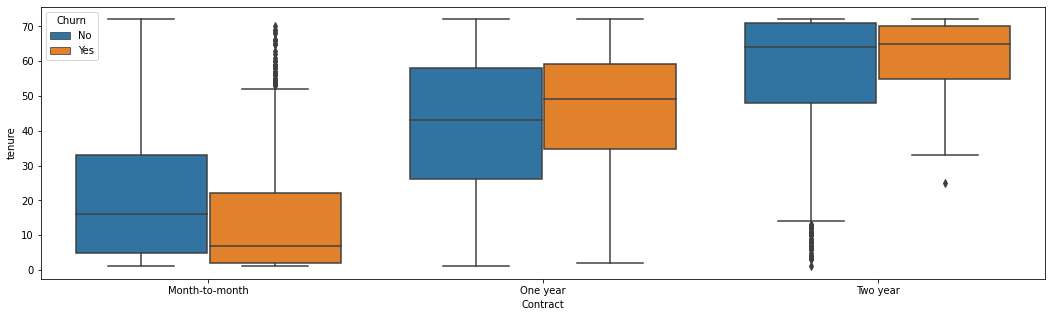

In [185]:
fig = plt.figure(figsize=(18,5))

sns.boxplot(x=new_data.Contract,y=new_data.tenure,hue=new_data.Churn)

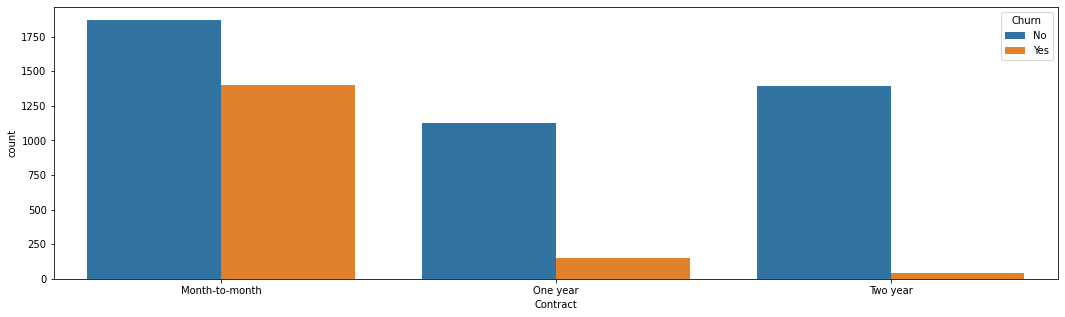

In [186]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.Contract,hue=new_data.Churn)

### People who took month to month contract are more likely to leave the compay than those who have other plans

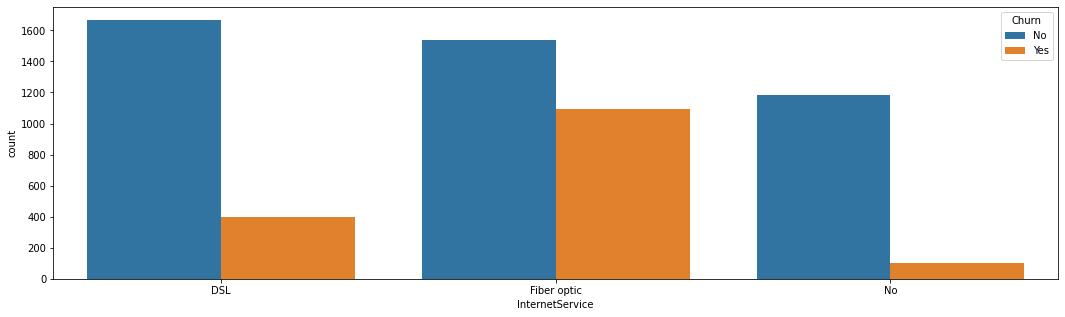

In [188]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.InternetService,hue=new_data.Churn)

### The Customers who use Fiber optic are more likly to have high churn rate compare to other service users

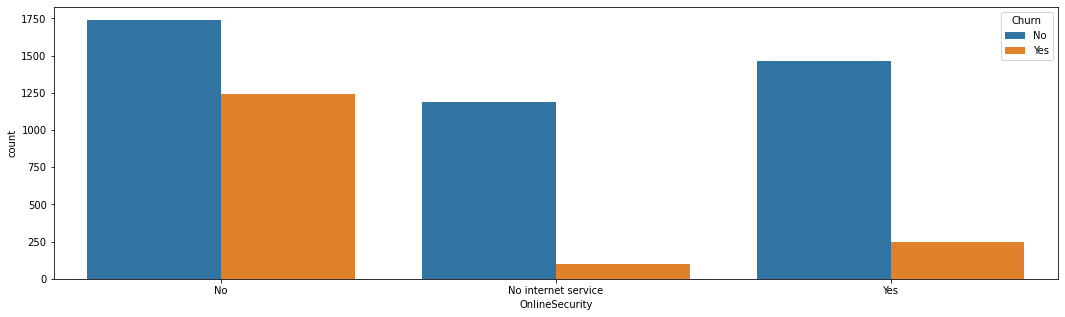

In [189]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.OnlineSecurity,hue=new_data.Churn)

### Those who do not have Online security/OnlineBackup/DeviceProtection/TechSupport tend to leave the company 

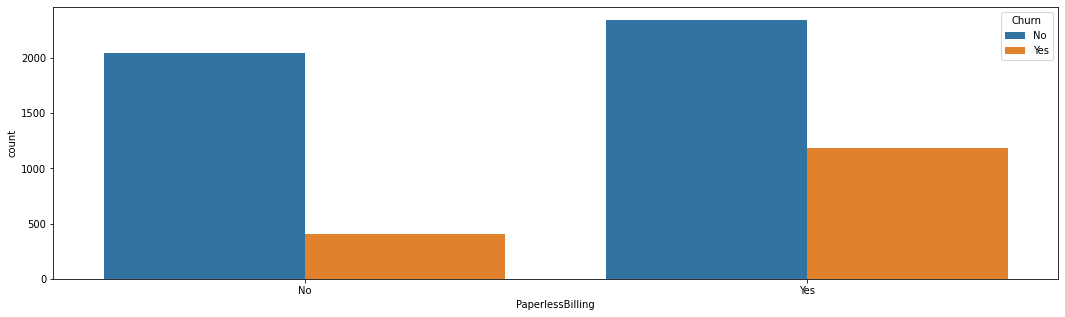

In [190]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.PaperlessBilling,hue=new_data.Churn)

### Those who pay bill using paperless payment tend to leave the company

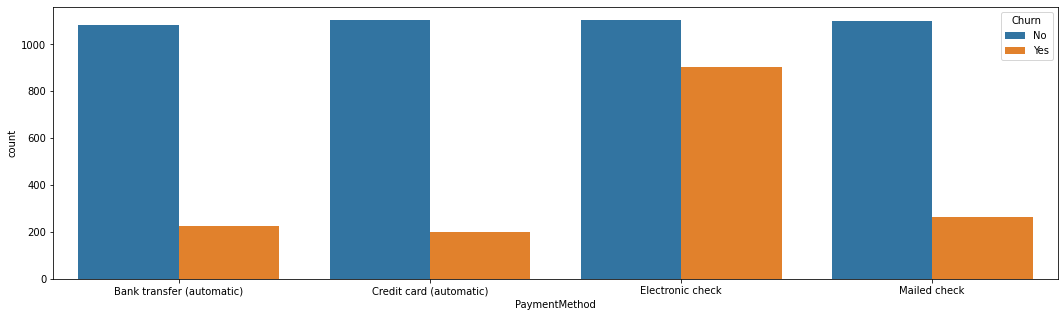

In [191]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.PaymentMethod,hue=new_data.Churn)

### Those who use electronic check for payment tend to leave the company

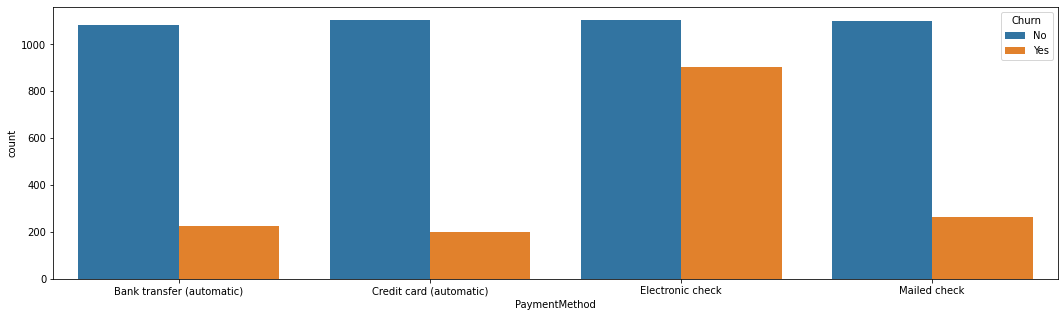

In [192]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.PaymentMethod,hue=new_data.Churn)

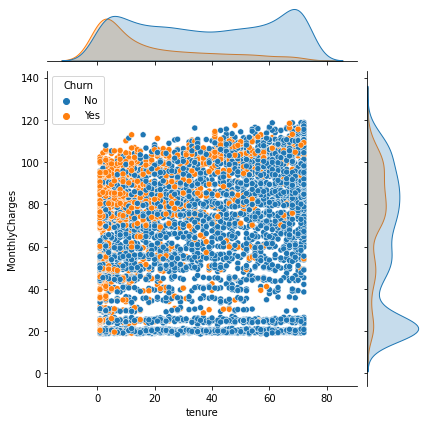

In [193]:
sns.jointplot(x='tenure',y='MonthlyCharges',data=new_data,hue='Churn')

### If the tenure is less and Monthly charge is also less then those customers are less likely to leave the company

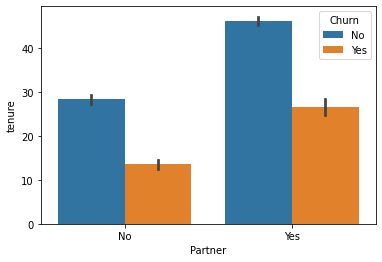

In [194]:
sns.barplot(x='Partner',y='tenure',data=new_data,hue='Churn')

# Finalizing the findings

### 0.Mostly the new customers are more likly to leave the company
### 1.Total Charge is highly correlated tenure and Monthly charge
### 2. Most of the customers leaves within a short period of time 
### 3. Most of the new customers leave the company when they are charged high mothly Charge
### 4. Those who pay high total charge whithin short tenure, tend to leave the company  
### 5. If the monthly charge is less then the customers are less likely to leave the company
### 6. The churn starts when the Monthly charge is greater than 45
### 7.People who took month to month contract are more likely to leave the compay than those who have other plans
### 8.The Customers who use Fiber optic are more likly to have high churn rate compare to other service users
### 9.Those who do not have Online security/OnlineBackup/DeviceProtection/TechSupport tend to leave the company 
### 10.Those who pay bill using paperless payment seem to have high churn rate
### 11.Those who use electronic check for payment tend to leave the company
### 12.If the tenure is less and Monthly charge is also less then those customers are less likely to leave the company
### 13. The data is not balanced

# Building The Model

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

### Data Preprocessing

In [196]:
new_data.dtypes

gender                  category
SeniorCitizen           category
Partner                 category
Dependents              category
PhoneService            category
MultipleLines           category
InternetService         category
OnlineSecurity          category
OnlineBackup            category
DeviceProtection        category
TechSupport             category
StreamingTV             category
StreamingMovies         category
Contract                category
PaperlessBilling        category
PaymentMethod           category
Churn                   category
tenure                   float64
MonthlyCharges           float64
TotalCharges             float64
monthly_times_total      float64
Sqrt_monthly_total       float64
monthly_plus_tenure      float64
monthly_times_tenure     float64
dtype: object

In [197]:
new_data.SeniorCitizen=new_data.SeniorCitizen.astype('int')
new_data.tenure=new_data.tenure.astype('int')

### If we take dummies for this dataset then we wil not be able to identify the features so let's add all the feature names to theri values

In [198]:
def set_feature_name(X):
    categorical_columns= X.columns[X.dtypes=='category']
    
    for i in categorical_columns:
        X[i]=X[i].apply(lambda m: str(i)+'_'+str(m))
    return X

            
    

In [199]:
set_feature_name(new_data)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges,monthly_times_total,Sqrt_monthly_total,monthly_plus_tenure,monthly_times_tenure
0,gender_Male,0,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_No,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_Two year,PaperlessBilling_No,PaymentMethod_Credit card (automatic),Churn_No,72,24.10,1734.65,41805.0650,204.462869,96.10,1735.2
1,gender_Female,0,Partner_No,Dependents_No,PhoneService_Yes,MultipleLines_No,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_No,StreamingTV_Yes,StreamingMovies_No,Contract_Month-to-month,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),Churn_No,44,88.15,3973.20,350237.5800,591.808736,132.15,3878.6
2,gender_Female,1,Partner_Yes,Dependents_No,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingTV_No,StreamingMovies_No,Contract_Month-to-month,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),Churn_Yes,38,74.95,2869.85,215095.2575,463.783632,112.95,2848.1
3,gender_Male,0,Partner_No,Dependents_No,PhoneService_Yes,MultipleLines_No,InternetService_DSL,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingTV_No,StreamingMovies_Yes,Contract_Month-to-month,PaperlessBilling_Yes,PaymentMethod_Electronic check,Churn_No,4,55.90,238.50,13332.1500,115.464930,59.90,223.6
4,gender_Male,0,Partner_No,Dependents_No,PhoneService_Yes,MultipleLines_No,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_Yes,TechSupport_No,StreamingTV_No,StreamingMovies_No,Contract_Month-to-month,PaperlessBilling_No,PaymentMethod_Electronic check,Churn_No,2,53.45,119.50,6387.2750,79.920429,55.45,106.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,gender_Male,0,Partner_Yes,Dependents_No,PhoneService_Yes,MultipleLines_No,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,PaperlessBilling_Yes,PaymentMethod_Electronic check,Churn_Yes,1,95.00,95.00,9025.0000,95.000000,96.00,95.0
5982,gender_Female,0,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),Churn_No,23,91.10,2198.30,200265.1300,447.509922,114.10,2095.3
5983,gender_Male,0,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,InternetService_No,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_Month-to-month,PaperlessBilling_Yes,PaymentMethod_Electronic check,Churn_No,12,21.15,306.05,6472.9575,80.454692,33.15,253.8
5984,gender_Male,1,Partner_No,Dependents_No,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_Yes,TechSupport_No,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,PaperlessBilling_Yes,PaymentMethod_Electronic check,Churn_Yes,12,99.45,1200.15,119354.9175,345.477810,111.45,1193.4


In [200]:
### Converting categorical features into numerical features

def convert_numerical(X):
    
    categorical_columns= X.columns[X.dtypes=='category']
    
    for i in categorical_columns:
        dummies = pd.get_dummies(X[i],drop_first=True)
        X=pd.concat([X,dummies],axis=1)
        X.drop(i,axis=1,inplace=True)
    return X

In [201]:
final_data=convert_numerical(new_data)

In [202]:
final_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,monthly_times_total,Sqrt_monthly_total,monthly_plus_tenure,monthly_times_tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,72,24.10,1734.65,41805.0650,204.462869,96.10,1735.2,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
1,0,44,88.15,3973.20,350237.5800,591.808736,132.15,3878.6,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,1,38,74.95,2869.85,215095.2575,463.783632,112.95,2848.1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,4,55.90,238.50,13332.1500,115.464930,59.90,223.6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,0,2,53.45,119.50,6387.2750,79.920429,55.45,106.9,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,95.00,95.00,9025.0000,95.000000,96.00,95.0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1
5982,0,23,91.10,2198.30,200265.1300,447.509922,114.10,2095.3,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0
5983,0,12,21.15,306.05,6472.9575,80.454692,33.15,253.8,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
5984,1,12,99.45,1200.15,119354.9175,345.477810,111.45,1193.4,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1


In [203]:
X=final_data.drop('Churn_Yes',axis=1)
y=final_data['Churn_Yes']

In [204]:
# Handling imbalanced data - Using SMOTE Method

over_saample=SMOTE()
X_sample,y_sample = over_saample.fit_resample(X,y)

X_sample=pd.DataFrame(X_sample,columns=X.columns)
y_sample=pd.Series(y_sample,name='Churn')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [205]:
# Storing the preprocessed data

In [206]:
X_sample.to_csv(r'C:\Users\Vishnu\Desktop\datas\Telecom\pre_proc_X.csv')

In [207]:
y_sample.to_csv("pre_pro_y.csv")

In [208]:
### Splitting the data into training and testing data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,test_size=0.2)

# Hyper Parameter Tuning - Random Forest`m

In [209]:
def tune(X,y,Estimator):
    total_features = len(X.columns)
    score=-50
    best_params={}
    for i in range(total_features,0,-1):
        if i>1:
            feature_selector=RFE(estimator=Estimator,n_features_to_select=i)
            X=feature_selector.fit_transform(X,y)
            Scaler=StandardScaler()
            X=Scaler.fit_transform(X)
            new_score=cross_val_score(Estimator,X,y).mean()
            if new_score>score:
                score=new_score
                best_params["Best_size"]=i
                best_params["Best_Score"]=new_score
            print(f"No_feat:{i}     Score: {new_score}")
    return best_params

In [210]:
tune(X_sample,y_sample,RandomForestClassifier(max_depth=15))

No_feat:34     Score: 0.8518046713263114
No_feat:33     Score: 0.8503236441277444
No_feat:32     Score: 0.8491844972710577
No_feat:31     Score: 0.852260576679711
No_feat:30     Score: 0.8519192155183044
No_feat:29     Score: 0.8504381883197374
No_feat:28     Score: 0.848957096223611
No_feat:27     Score: 0.85066591385498
No_feat:26     Score: 0.8481593105283312
No_feat:25     Score: 0.8477037945602867
No_feat:24     Score: 0.8507789005055519
No_feat:23     Score: 0.8503237090253035
No_feat:22     Score: 0.8513484414851158
No_feat:21     Score: 0.8472476296166501
No_feat:20     Score: 0.8469063333528025
No_feat:19     Score: 0.848956447248019
No_feat:18     Score: 0.8457667322132014
No_feat:17     Score: 0.8457667322132014
No_feat:16     Score: 0.8487286568152171
No_feat:15     Score: 0.8466771151736984
No_feat:14     Score: 0.8465626358792646
No_feat:13     Score: 0.8430308458098891
No_feat:12     Score: 0.8421178020494648
No_feat:11     Score: 0.8383580268546099
No_feat:10     Score:

{'Best_Score': 0.852260576679711, 'Best_size': 31}

In [219]:
# Training Our Model

Random_forest_model = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=22)

In [220]:
# Feature Selection

### After doing hyper parameter tuning i got these parameters as best

        # 1.n_estimators =100
        # 2.max_depth = 15

In [221]:
f_s = RFE(estimator=Random_forest_model,n_features_to_select=23)
X_train=f_s.fit_transform(X_train,y_train)
X_test = f_s.transform(X_test)

In [222]:
# Training 


Random_forest_model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=22, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
# Prediction

predicted = Random_forest_model.predict(X_test)


In [224]:

# Accuracy

sum(y_test==predicted)/len(y_test)

0.8701594533029613

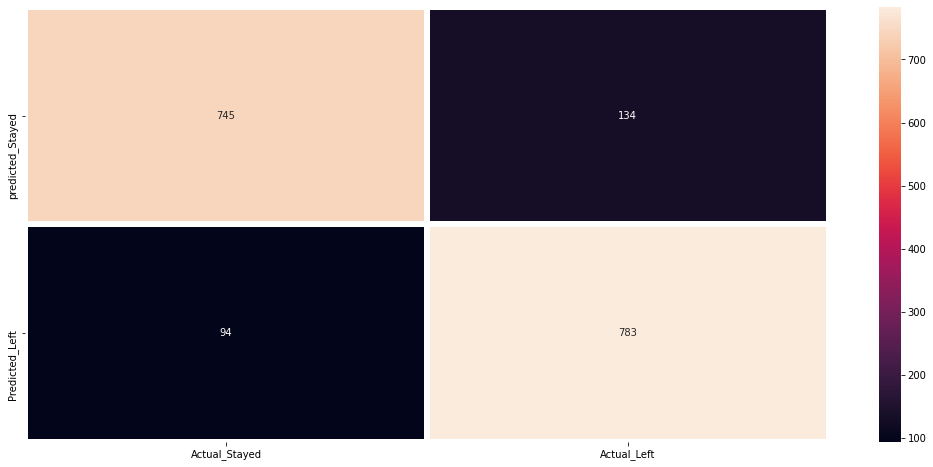

In [228]:
# Confusion Matrix

confusion_mat=confusion_matrix(y_test,predicted)

fig = plt.figure(figsize=(18,8))
sns.heatmap(confusion_mat.T,annot=True,fmt = 'd',xticklabels=['Actual_Stayed','Actual_Left'],
            yticklabels=["predicted_Stayed","Predicted_Left"],annot_kws={'fontsize':10},linewidths=5)

In [229]:
# All Scores

# roc_auc_score

print("roc_auc_score : ",roc_auc_score(y_test,predicted),'\n')

print(classification_report(y_test,predicted))


roc_auc_score :  0.8709165894382757 

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       839
           1       0.89      0.85      0.87       917

    accuracy                           0.87      1756
   macro avg       0.87      0.87      0.87      1756
weighted avg       0.87      0.87      0.87      1756



In [230]:
# Cross Validation report

print("Precision : ",cross_val_score(Random_forest_model,X_sample,y_sample,cv=10,scoring='precision').mean())
print("Recall : ",cross_val_score(Random_forest_model,X_sample,y_sample,cv=10,scoring='recall').mean())
print("F1 : ",cross_val_score(Random_forest_model,X_sample,y_sample,cv=10,scoring='f1').mean())
print("Accuracy : ",cross_val_score(Random_forest_model,X_sample,y_sample,cv=10,scoring='accuracy').mean())

Precision :  0.8779562450402475
Recall :  0.8355353075170843
F1 :  0.8450586149510974
Accuracy :  0.8611465365204947
